In [54]:
# Importing necessary libraries
import numpy as np  
import matplotlib.pyplot as plt  
import scipy 
import math  


# finite difference method to calculate the second derivative of a function
def d2f(f, dz, Nz):
    sol = np.zeros((Nz))  # Initialize solution array
    for i in range(1, Nz - 2):
        sol[i] = (f[i - 1] - 2 * f[i] + f[i + 1]) / (dz * dz)
    # Apply boundary conditions at i=0
    sol[0] = (2 * f[0] - 5 * f[1] + 4 * f[2] - f[3]) / (dz * dz)
    # Apply boundary conditions at i=Nz-1
    sol[Nz - 1] = (2 * f[Nz - 1] - 5 * f[Nz - 2] + 4 * f[Nz - 3] - f[Nz - 4]) / (dz * dz)
    return sol

# Function to call the second derivative function
def ddf(f,dz,Nz):
    return d2f(f,dz,Nz)

# Runge-Kutta method for time stepping
def solve(f,ddf,dz,Nz,dt,Nt,f_z0,f_zf,time_plot):
    f_plot=[f]  # Initialize array to store function values for plotting
    #print(f)
    plt.plot(z,f)
    #f_nzby2 = [f[int(Nz/2)]]  # Initialize array to store function values at Nz/2

    # Time stepping loop
    for j in range(1,Nt+1):
        # Calculate Runge-Kutta coefficients
        k1 = ddf(f, dz, Nz)
        k2 = ddf(f, dz, Nz)
        k3 = ddf(f, dz, Nz) 
        k4 = ddf(f, dz, Nz) 
        # Update function values
        f = f + ((dt / 6.0) * (k1 +( 2 * k2) + (2 * k3) + k4))
        # Apply boundary conditions
        f[0]=A*np.sin(2*np.pi*j*tf/Nt/24)+20
        f[Nz-1]=20
        
        # Store function value at Nz/2
        # f_nzby2.append(f[int(Nz/2)])

        # Store function values for specified time steps
        if j in time_plot:
            f_plot.append(f)

    # Return arrays for plotting
    return np.array(f_plot)

[20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20]


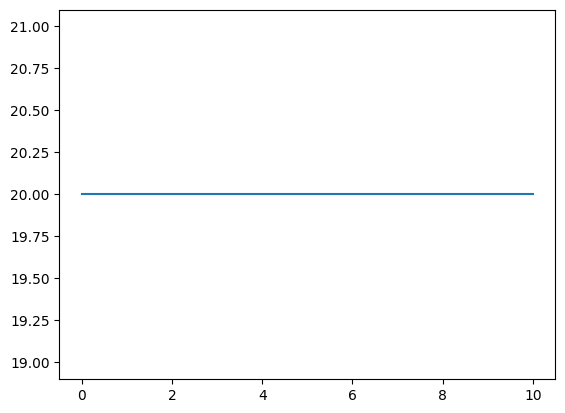

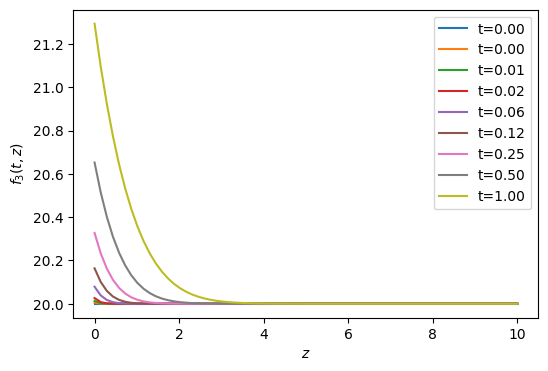

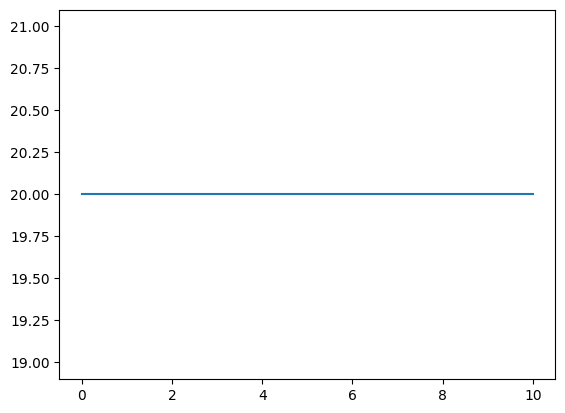

In [70]:
z0 = 0  # start of spatial region in z
zf = 10  # end of spatial region in z
t0 = 0  # start of time region
tf = 1  # end of time region 
Nz = 70  # number of spatial grid points
Nt = 10000  # number of time points
z = np.linspace(z0, zf, Nz)  # spatial grid points
A=5
# Define the function f3_t0
def f3_t0(z):
    return np.array([20] * 70) 
# def f3_t0(z):
#     return 6*(z**3)+4*np.sin(4*np.pi*z)

# Define the function f4_t0
def f4_t0(z):
    return 6*(z**3)+4*np.sin(4*np.pi*z)  

# Calculate the initial conditions for f3 and f4 over the spatial domain
f3_t0_inz = f3_t0(z)
f4_t0_inz = f4_t0(z)

print(f3_t0_inz)


# Calculate the boundary condition of the spatial domain for f3 and f4 
f3_z0=f3_t0(z0)
f4_z0=f4_t0(z0)
f3_zf=f3_t0(zf)
f4_zf=f4_t0(zf)

dz = (zf - z0) / (Nz - 1)  # spatial step size
dt = (tf -t0)/ Nt  # time step size

# Time points at which we want to plot the solution
time_plot=[0,40,100,200,600,Nt/8,Nt/4,Nt/2,Nt]

# Time grid points
time = np.linspace(0, (tf-t0), Nt+1)

# Solve the differential equation 
f3_plot = solve(f3_t0_inz,ddf,dz,Nz,dt,Nt,f3_z0,f3_zf,time_plot)
# f4_plot,f4_nzby2= solve(f4_t0_inz,ddf,dz,Nz,dt,Nt,f4_z0,f4_zf,time_plot)

# Plot the solution for f3 at different time steps
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for m in range(len(time_plot)):
    ax.plot(z, f3_plot[m], label=f't={time_plot[m] * dt:.2f}')
ax.set_xlabel(r'$z$')  # Label for the x-axis
ax.set_ylabel(r'$f_{3}(t,z)$')  # Label for the y-axis
ax.legend()  # Show the legend
plt.show()  # Display the plot


plt.plot(z,f3_plot[0])
# # Plot the solution for f4 at different time steps
# fig, ax = plt.subplots(1, 1, figsize=(6, 4))
# for m in range(len(time_plot)):
#     ax.plot(z, f4_plot[m], label=f't={time_plot[m] * dt:.2f}')
# ax.set_xlabel(r'$z$')  # Label for the x-axis
# ax.set_ylabel(r'$f_{4}(t,z)$')  # Label for the y-axis
# ax.legend()  # Show the legend
# plt.show()  # Display the plot

In [60]:
def f3_t0(z):
    return 20 
# def f3_t0(z):
#     return 6*(z**3)+4*np.sin(4*np.pi*z)

# Define the function f4_t0
def f4_t0(z):
    return 6*(z**3)+4*np.sin(4*np.pi*z)  

# Calculate the initial conditions for f3 and f4 over the spatial domain
f3_t0_inz = f3_t0(z)
f4_t0_inz = f4_t0(z)

print(f4_t0_inz)

array_20 = np.full(z, 20)

[ 0.          0.99480755  1.9273987   2.73948442  3.3803837   3.81022607
  4.00247491  3.945613    3.64388421  3.11704497  2.39914101  1.53638621
  0.58427693 -0.39587693 -1.34078621 -2.18914101 -2.88544497 -3.38348421
 -3.649213   -3.66287491 -3.42022607 -2.9327837  -2.22708442 -1.3429987
 -0.33120755  0.75        1.83840755  2.8717987   3.79188442  4.5479837
  5.10022607  5.42207491  5.502013    5.34428421  4.96864497  4.40914101
  3.71198621  2.93267693  2.13252307  1.37481379  0.72085899  0.22615503
 -0.06308421 -0.112813    0.09672509  0.56977393  1.2948163   2.24531558
  3.3814013   4.65239245  6.          7.36200755  8.6761987   9.88428442
 10.9355837  11.79022607 12.42167491 12.818413   12.98468421 12.94024497
 12.71914101 12.36758621 11.94107693 11.50092307 11.11041379 10.83085899
 10.71775503 10.81731579 11.163587   11.77632509 12.65977393 13.8024163
 15.17771558 16.7458013  18.45599245 20.25       22.06560755 23.8405987
 25.51668442 27.0431837  28.38022607 29.50127491 30.394

ValueError: maximum supported dimension for an ndarray is 32, found 101

In [68]:
#list_of_20s = [20] * 101
print(np.array([20] * 101))


[20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20]
